# Packages

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pickle

from sklearn.metrics import mean_squared_error

# Loading and preparing data for models

In [7]:
df = pd.read_csv("../../assets/teste_indicium_precificacao.csv")

In [8]:
df_pp = df.copy()
df_pp = df_pp[(df_pp['price'] > 0) & (df_pp['price'] <= 230)]
df_pp = pd.get_dummies(df_pp, columns=['bairro_group'], prefix=['bairro_group_type'], dtype=int)
df_pp = pd.get_dummies(df_pp, columns=['room_type'], prefix=['room_type_type'], dtype=int)
df_pp.loc[:, 'ultima_review_timestamp'] = df_pp['ultima_review'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp() if pd.notnull(x) else None)
df_pp = df_pp.dropna()


In [9]:
X = df_pp.drop("price", axis=1)
y = df_pp.price

X_norm = X.select_dtypes(exclude=["object"])
X_norm = X_norm.astype('float')
X_norm = X_norm.iloc[:, 2:]
columns = X_norm.columns
mms = MinMaxScaler()
X_norm = mms.fit_transform(X_norm)
X_norm = pd.DataFrame(X_norm, columns=columns)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Loading model

In [3]:
with open('../../assets/supervised_best_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [5]:
model

Ridge(alpha=0.01, max_iter=1000, solver='saga')

# Applying model and results

In [13]:
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.reset_index(drop=True, inplace=True)
results

1246.4294265703056


,Actual,Predicted
0,62,101.023584
1,79,83.176362
2,53,75.985698
3,199,129.040433
4,80,93.785875
...,...,...
6810,96,68.170348
6811,72,86.106954
6812,125,126.587514
6813,150,133.760107


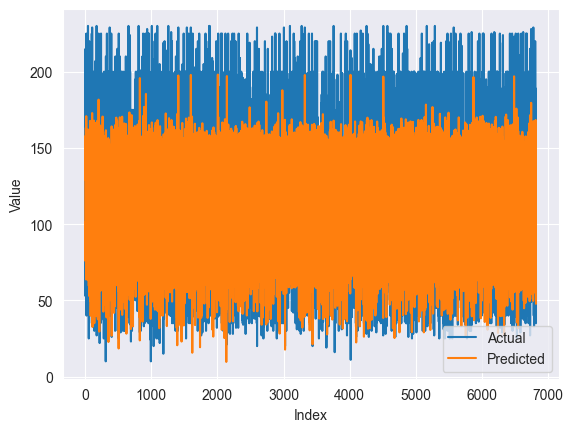

In [14]:
plt.plot(results['Actual'], label='Actual')
plt.plot(results['Predicted'], label='Predicted')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()

# Prevendo uma única amostra

In [45]:
amostra = {'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'price': 225,
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355}

df_amostra = pd.DataFrame(amostra, index=[0])
df_amostra

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [51]:
df_pp = df.copy()
df_pp2 = pd.concat([df_pp, df_amostra])
df_pp2 = df_pp2[(df_pp2['price'] > 0) & (df_pp2['price'] <= 230)]
df_pp2 = pd.get_dummies(df_pp2, columns=['bairro_group'], prefix=['bairro_group_type'], dtype=int)
df_pp2 = pd.get_dummies(df_pp2, columns=['room_type'], prefix=['room_type_type'], dtype=int)
df_pp2.loc[:, 'ultima_review_timestamp'] = df_pp2['ultima_review'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').timestamp() if pd.notnull(x) else None)
df_pp2 = df_pp2.dropna()

df_pp2


,id,nome,host_id,host_name,bairro,latitude,longitude,price,minimo_noites,numero_de_reviews,...,disponibilidade_365,bairro_group_type_Bronx,bairro_group_type_Brooklyn,bairro_group_type_Manhattan,bairro_group_type_Queens,bairro_group_type_Staten Island,room_type_type_Entire home/apt,room_type_type_Private room,room_type_type_Shared room,ultima_review_timestamp
0,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,225,1,45,...,355,0,0,1,0,0,1,0,0,1.558408e+09
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,89,1,270,...,194,0,1,0,0,0,1,0,0,1.562296e+09
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,80,10,9,...,0,0,0,1,0,0,1,0,0,1.542596e+09
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Murray Hill,40.74767,-73.97500,200,3,74,...,129,0,0,1,0,0,1,0,0,1.561172e+09
5,5121,BlissArtsSpace!,7356,Garon,Bedford-Stuyvesant,40.68688,-73.95596,60,45,49,...,0,0,1,0,0,0,0,1,0,1.507172e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48781,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Upper East Side,40.78099,-73.95366,129,1,1,...,147,0,0,1,0,0,0,1,0,1.562468e+09
48789,36427429,No.2 with queen size bed,257683179,H Ai,Flushing,40.75104,-73.81459,45,1,1,...,339,0,0,0,1,0,0,1,0,1.562468e+09
48804,36442252,1B-1B apartment near by Metro,273841667,Blaine,Mott Haven,40.80787,-73.92400,100,1,2,...,40,1,0,0,0,0,1,0,0,1.562468e+09
48851,36455809,"Cozy Private Room in Bushwick, Brooklyn",74162901,Christine,Bushwick,40.69805,-73.92801,30,1,1,...,1,0,1,0,0,0,0,1,0,1.562555e+09


In [53]:
X = df_pp2.drop("price", axis=1)
y = df_pp2.price

X_norm = X.select_dtypes(exclude=["object"])
X_norm = X_norm.astype('float')
X_norm = X_norm.iloc[:, 2:]
columns = X_norm.columns
mms = MinMaxScaler()
X_norm = mms.fit_transform(X_norm)
X_norm = pd.DataFrame(X_norm, columns=columns)

X_norm

,latitude,longitude,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_group_type_Bronx,bairro_group_type_Brooklyn,bairro_group_type_Manhattan,bairro_group_type_Queens,bairro_group_type_Staten Island,room_type_type_Entire home/apt,room_type_type_Private room,room_type_type_Shared room,ultima_review_timestamp
0,0.607918,0.490469,0.000000,0.070064,0.006326,0.003067,0.972603,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.984127
1,0.439518,0.535649,0.000000,0.428344,0.079159,0.000000,0.531507,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.999008
2,0.718308,0.565324,0.007206,0.012739,0.001539,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.923611
3,0.593287,0.506972,0.001601,0.116242,0.009916,0.000000,0.353425,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.994709
4,0.443797,0.542800,0.035228,0.076433,0.006668,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.788029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34067,0.675224,0.547128,0.000000,0.000000,0.016926,0.000000,0.402740,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.999669
34068,0.601574,0.808818,0.000000,0.000000,0.016926,0.015337,0.928767,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.999669
34069,0.741325,0.602939,0.000000,0.001592,0.034023,0.000000,0.109589,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.999669
34070,0.471265,0.595394,0.000000,0.000000,0.016926,0.000000,0.002740,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000


In [59]:
model.predict(X_norm.iloc[0].values.reshape(1,-1))

C:\Users\guimi\miniconda3\envs\sirius\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


array([167.72399638])

Considerando a amostra teste, o preço sugerido é 167,72 dólares a diária. 